# Boosting

## AdaBoost

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
# Read the Dataset
df_breastcancer = pd.read_csv("data/breastcancer.csv")

In [ ]:
df_breastcancer.head(5)

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   id                       569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_breastcancer['diagnosis'] = lb.fit_transform(df_breastcancer['diagnosis']) #Fit label encoder and return encoded labels

df_breastcancer.head(5) #Results in appending a new column to df

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_breastcancer.isnull().sum() #check missing values

diagnosis                  0
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#create feature & response variables

# drop the response var and id column as it'll not make any sense to the analysis
X = df_breastcancer.iloc[:,2:31]  

#Target
Y = df_breastcancer.iloc[:,0] 

# Create train & test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0, stratify= Y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(398, 29)
(171, 29)
(398,)
(171,)


In [ ]:
df_breastcancer.iloc[:,2:31]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


In [ ]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
# Mean accuracy
print('The mean accuracy is: ',(dtree.score(X_test,Y_test))*100,'%')

#AUC score
y_pred_dtree = dtree.predict_proba(X_test)
fpr_dtree, tpr_dtree, thresholds = roc_curve(Y_test, y_pred_dtree[:,1]) # false positive rate, true positive rate
auc_dtree = auc(fpr_dtree, tpr_dtree)
print ('AUC Score: ', auc_dtree)

The mean accuracy is:  91.81286549707602 %
AUC Score:  0.9161799065420559


## Adaboost uses Decision Tree classifier with learning_rate=0.1

In [ ]:
AdaBoost = AdaBoostClassifier(n_estimators=100, base_estimator=dtree, learning_rate=0.1, random_state=42)
AdaBoost.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=0),
                   learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
# Mean accuracy
print('The mean accuracy is: ',(AdaBoost.score(X_test,Y_test))*100,'%')

#AUC score
y_pred_adaboost = AdaBoost.predict_proba(X_test)
fpr_ab, tpr_ab, thresholds = roc_curve(Y_test, y_pred_adaboost[:,1])
auc_adaboost = auc(fpr_ab, tpr_ab)
print ('AUC Score: ', auc_adaboost)

The mean accuracy is:  92.98245614035088 %
AUC Score:  0.9742260514018691


## Tune the hyper-parameter

In [ ]:
# Tuning the hyperparams
AdaBoost_with_tuning = AdaBoostClassifier(n_estimators=100, base_estimator=dtree, learning_rate=0.4, random_state=0)
AdaBoost_with_tuning.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=0),
                   learning_rate=0.4, n_estimators=100, random_state=0)

In [ ]:
# Mean accuracy
print('The mean accuracy is: ',(AdaBoost_with_tuning.score(X_test,Y_test))*100,'%')

#AUC score
y_pred_adaboost_tune = AdaBoost_with_tuning.predict_proba(X_test)
fpr_ab_tune, tpr_ab_tune, thresholds = roc_curve(Y_test, y_pred_adaboost_tune[:,1])
auc_adaboost_tune = auc(fpr_ab_tune, tpr_ab_tune)
print ('AUC Score: ', auc_adaboost_tune)

The mean accuracy is:  94.73684210526315 %
AUC Score:  0.9840829439252337


## AdaBoost with SVC

In [ ]:
Adaboost_with_svc_rbf =AdaBoostClassifier(n_estimators=100, base_estimator=SVC(C=100, probability=True, kernel='rbf'), learning_rate=1, random_state=0)
Adaboost_with_svc_rbf.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=SVC(C=100, probability=True), learning_rate=1,
                   n_estimators=100, random_state=0)

In [ ]:
# Mean accuracy
print('The mean accuracy is: ',(Adaboost_with_svc_rbf.score(X_test,Y_test))*100,'%') 

#AUC score
y_pred_svc_rbf = Adaboost_with_svc_rbf.predict_proba(X_test)
fpr_svc_rbf, tpr_svc_rbf, thresholds = roc_curve(Y_test, y_pred_svc_rbf[:,1])
auc_svc_rbf = auc(fpr_svc_rbf, tpr_svc_rbf)
print ('AUC Score: ', auc_svc_rbf)

The mean accuracy is:  62.57309941520468 %
AUC Score:  0.9959112149532711


In [ ]:
Adaboost_with_svc_linear =AdaBoostClassifier(n_estimators=100, base_estimator=SVC(C=10, probability=True, kernel='linear'), learning_rate=0.3, random_state=0)
Adaboost_with_svc_linear.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=SVC(C=10, kernel='linear', probability=True),
                   learning_rate=0.3, n_estimators=100, random_state=0)

In [ ]:
print('The mean accuracy is: ',(Adaboost_with_svc_linear.score(X_test,Y_test))*100,'%') 

#AUC score
y_pred = Adaboost_with_svc_linear.predict_proba(X_test)
fpr_svc_lin, tpr_svc_lin, thresholds = roc_curve(Y_test, y_pred[:,1])
auc_svc_linear = auc(fpr_svc_lin, tpr_svc_lin)
print ('AUC Score: ', auc_svc_linear)

The mean accuracy is:  78.94736842105263 %
AUC Score:  0.9951810747663551


In [ ]:
#grid search using svm
Adaboost_with_svc = AdaBoostClassifier(base_estimator=SVC(C=100, probability=True, kernel='linear'), random_state=0)

Ada_Grid = {'n_estimators': [10, 100],
           'learning_rate': [0.3, 1]}

estimator = Adaboost_with_svc
Adaboost_with_grid_search = GridSearchCV(estimator, Ada_Grid).fit(X_train, Y_train)
print(Adaboost_with_grid_search.best_params_)
print(Adaboost_with_grid_search.best_score_)

{'learning_rate': 0.3, 'n_estimators': 10}
0.944620253164557


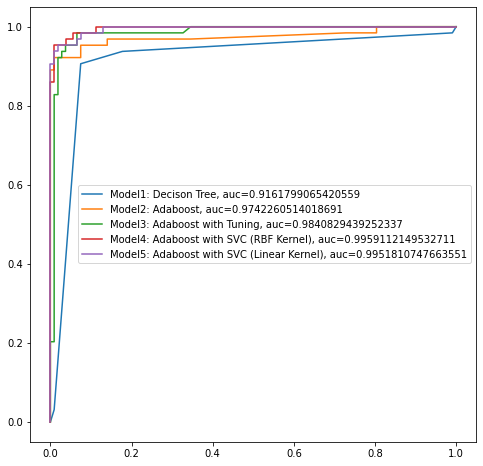

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

plt.plot(fpr_dtree, tpr_dtree,label="Model1: Decison Tree, auc="+str(auc_dtree))
plt.plot(fpr_ab, tpr_ab,label="Model2: Adaboost, auc="+str(auc_adaboost))
plt.plot(fpr_ab_tune,tpr_ab_tune,label="Model3: Adaboost with Tuning, auc="+str(auc_adaboost_tune))
plt.plot(fpr_svc_rbf, tpr_svc_rbf, label="Model4: Adaboost with SVC (RBF Kernel), auc="+str(auc_svc_rbf))
plt.plot(fpr_svc_lin, tpr_svc_lin, label="Model5: Adaboost with SVC (Linear Kernel), auc="+str(auc_svc_linear))

plt.legend(loc=5)
plt.show()